In [7]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler


In [8]:
dataset = pd.read_csv("vm_ödev.csv")
print(dataset.head(5
                ))

FileNotFoundError: [Errno 2] No such file or directory: 'vm_ödev.csv'

<Axes: xlabel='smoking', ylabel='count'>

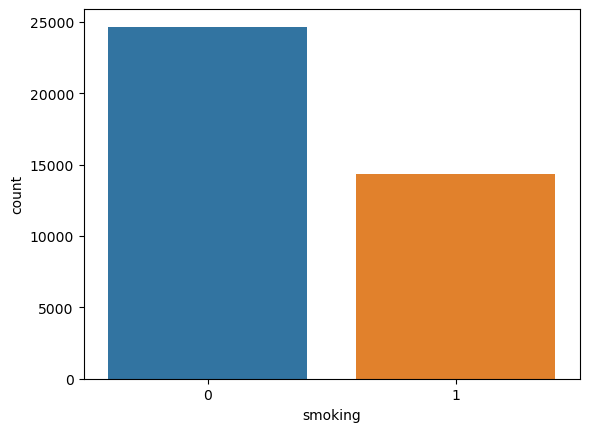

In [14]:
sb.countplot(x='smoking', data=dataset)

<Axes: xlabel='systolic', ylabel='hemoglobin'>

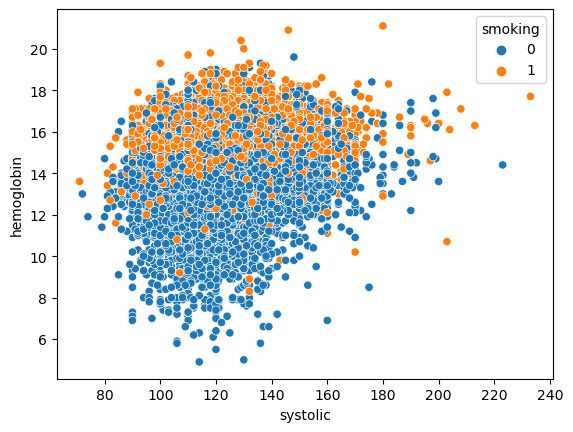

In [15]:
sb.scatterplot(x='systolic',y='hemoglobin',hue='smoking',data=dataset)

<Axes: xlabel='triglyceride', ylabel='relaxation'>

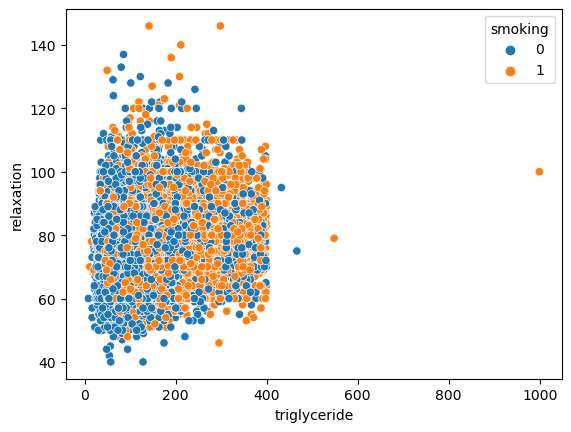

In [16]:
sb.scatterplot(x='triglyceride',y='relaxation',hue='smoking',data=dataset)

In [17]:
dataset.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [18]:
X = dataset.drop('smoking',axis=1)
Y = dataset['smoking']

In [19]:
print(X)

       age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0       35         170          85       97.0             0.9   
1       20         175         110      110.0             0.7   
2       45         155          65       86.0             0.9   
3       45         165          80       94.0             0.8   
4       20         165          60       81.0             1.5   
...    ...         ...         ...        ...             ...   
38979   40         165          60       80.0             0.4   
38980   45         155          55       75.0             1.5   
38981   40         170         105      124.0             0.6   
38982   40         160          55       75.0             1.5   
38983   55         175          60       81.1             1.0   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0                  0.9              1               1       118          78   
1                  0.9              1               1       1

In [20]:
print(Y)

0        1
1        0
2        0
3        0
4        0
        ..
38979    0
38980    0
38981    1
38982    1
38983    1
Name: smoking, Length: 38984, dtype: int64


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=2)

In [22]:
print(X.shape,X_train.shape,X_test.shape)

(38984, 22) (11695, 22) (27289, 22)


In [23]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=2)

In [24]:
knn_model.score(X_train,Y_train)*100

83.32620778110304

In [25]:
knn_model.score(X_test,Y_test)*100

67.71226501520759

In [26]:
prediction = knn_model.predict(X_test)

In [27]:
cross_check = pd.DataFrame({'Actual' : Y_test, 'Predicted': prediction})
cross_check

,Actual,Predicted
1094,0,0
9804,1,0
13034,1,0
38172,0,0
31411,0,1
...,...,...
33716,0,1
31591,0,1
18938,0,0
37143,0,0


In [28]:
cross_check = pd.DataFrame({'Actual' : Y_test, 'Predicted': prediction})
cross_check.head(100)

,Actual,Predicted
1094,0,0
9804,1,0
13034,1,0
38172,0,0
31411,0,1
...,...,...
20756,1,0
37322,1,0
14192,0,0
36881,1,0


In [29]:
predict = knn_model.predict(X_test)
cm = confusion_matrix(Y_test,prediction)
cm

array([[15278,  2017],
       [ 6794,  3200]], dtype=int64)

Text(158.22222222222223, 0.5, 'Actual')

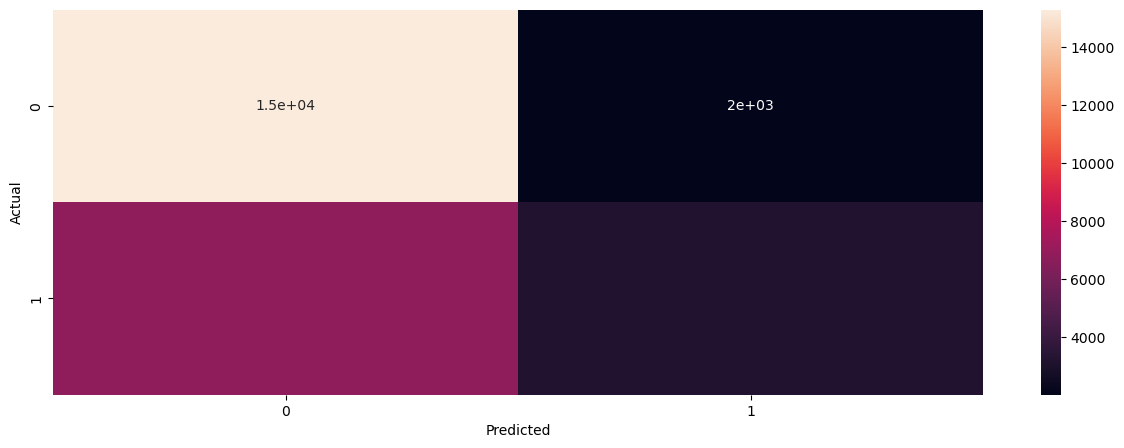

In [30]:
mp.figure(figsize=(15,5))
sb.heatmap(cm,annot=True)
mp.xlabel('Predicted')
mp.ylabel('Actual')

In [31]:
prediction = knn_model.predict(X_test)

# F1 skorunun hesaplanması
f1 = f1_score(Y_test, prediction, average='weighted')

print("F1 Skoru:", f1)

F1 Skoru: 0.6460128114124731


K-Means

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [36]:
x=dataset.iloc[:,[2,15,22]].values

In [37]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


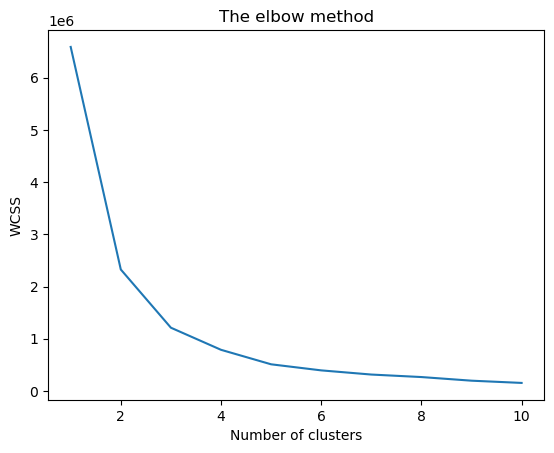

In [39]:
mp.plot(range(1, 11), wcss)
mp.title('The elbow method')
mp.xlabel('Number of clusters')
mp.ylabel('WCSS') #within cluster sum of squares
mp.show()


In [40]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


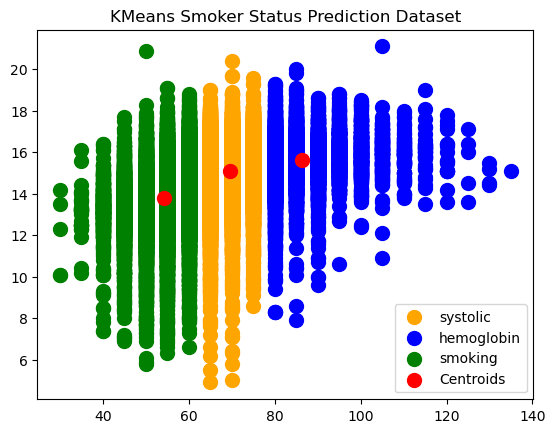

In [47]:
mp.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'systolic')
mp.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'hemoglobin')
mp.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'smoking')
mp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
mp.title('KMeans Smoker Status Prediction Dataset')
mp.legend()

C:\Users\Ibrahim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Ibrahim\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ibrahim\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
simila

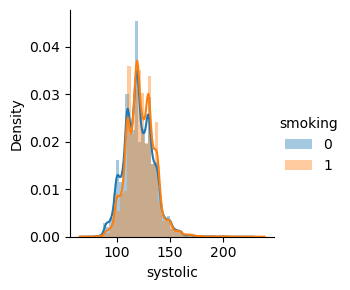

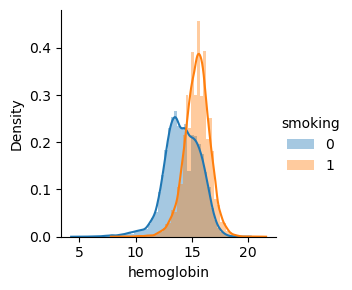

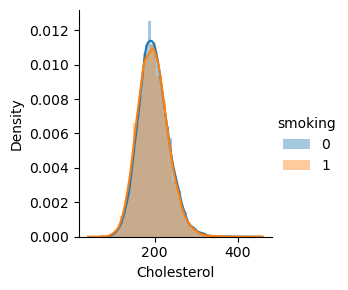

In [46]:
sb.FacetGrid(dataset,hue="smoking",height=3).map(sb.distplot,"systolic").add_legend()
sb.FacetGrid(dataset,hue="smoking",height=3).map(sb.distplot,"hemoglobin").add_legend()
sb.FacetGrid(dataset,hue="smoking",height=3).map(sb.distplot,"Cholesterol").add_legend()
mp.show()
